In [75]:
import os
import json
import pandas as pd
import string
import re
from collections import Counter
from konlpy.tag import Okt
import numpy as np
import matplotlib.pyplot as plt

In [49]:
TRAIN_PATH='./DATA/Training/'
folder_paths=os.listdir(TRAIN_PATH)

In [50]:
fashion_df=[]

for folder in folder_paths:
    #print(folder)
    folder_path=TRAIN_PATH+folder
    #print(folder_path)
    json_file=[file for file in os.listdir(folder_path) if file.endswith('.json')]
    #print(json_file)
    for file in json_file:
        file_path=os.path.join(folder_path,file)
        #print(file_path)

        try:
            with open(file_path,'r',encoding='utf-8') as f:
                data=json.load(f)

                if data:
                    for review in data:
                        aspects=pd.json_normalize(review.get('Aspects'))
                    fashion_df.append(aspects)
                else:
                    print(f'No data found in {file}')

        except json.JSONDecodeError:
            print(f"Error loading {file}: Invalid JSON")

In [51]:
if fashion_df:
    train_fashionDF=pd.concat(fashion_df,ignore_index=True)
    print(train_fashionDF)
else:
    print('No Valid Dataframe')

       Aspect              SentimentText SentimentWord SentimentPolarity
0         착용감                     넘 편해서              2                 1
1          소재     니트재질이라보니 보풀감은 어쩔수업머요ㅠㅠ             3                 1
2         활용성                  자주 손가입었어요             2                 1
3         디자인           레깅스에 가깝게보여 좋았는데              3                 1
4         디자인               받고보니 디잔이다릅니다             2                -1
...       ...                        ...           ...               ...
1228      디자인               예쁜 가방도 마련했겠다             3                 1
1229       품질  일단 바퀴의 성능이 탁월해서 너무 좋네요...             6                 1
1230       소재          외관에 스크래치도 덜 가구요..             4                 1
1231       색상                   색상도 좋으네요             2                 1
1232  사용성/편의성       4종류 용도에 맞게 사용하기 편리해요             5                 1

[1233 rows x 4 columns]


In [52]:
val_path='./data/Validation/'
folder_paths=os.listdir(val_path)

In [53]:
val_df=[]

for folder in folder_paths:
    path=val_path+folder
    #print(path)

    json_file=[file for file in os.listdir(path) if file.endswith('.json')]

    for file in json_file:
        file_paths=os.path.join(path,file)
        #print(file_paths)

        try:
            with open(file_paths,'r',encoding='utf-8') as f:
                val_data=json.load(f)

                if data:
                    for review in data:
                        aspects=pd.json_normalize(review.get('Aspects'))
                        val_df.append(aspects)
                else: print(f'no data found in {file}')

        except json.JSONDecodeError: print(f'error loading {file}')

In [54]:
if val_df:
    val_fashionDF=pd.concat(val_df,ignore_index=True)
    print(val_fashionDF)
else: print('no valid dataframe')

        Aspect                       SentimentText SentimentWord  \
0           가격                   가성비에 비하여 잘 산것 같아요             5   
1           수납                     캐리어 안에 수납도 좋고               4   
2         제품구성                    넉넉한 패키지구성도 좋아요^^             3   
3           무게                             가방이 가볍고             2   
4           소재                              부드러우면서             1   
...        ...                                 ...           ...   
13887       품질                  바퀴도 크고 부드럽게 잘 움직여서             5   
13888  사용성/편의성                         편하게 사용하겠어요.             2   
13889      디자인  캐리어 찾을때도 비슷비슷한 모양들 많은중에 눈에 띌것같네요^^             7   
13890       색상                            색상도 좋으네요             2   
13891  사용성/편의성                4종류 용도에 맞게 사용하기 편리해요             5   

      SentimentPolarity  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  
...                 ...  
1

In [55]:
train_fashionDF.isna().sum()

Aspect               0
SentimentText        0
SentimentWord        0
SentimentPolarity    0
dtype: int64

In [56]:
val_fashionDF.isna().sum()

Aspect               0
SentimentText        0
SentimentWord        0
SentimentPolarity    0
dtype: int64

In [57]:
train_fashionDF['Aspect'].value_counts()

Aspect
디자인            131
사이즈            118
가격             107
품질             101
소재              93
기능              90
착화감             83
착용감             69
색상              60
치수/사이즈          51
무게              45
길이              44
두께              37
핏               35
신축성             32
활용성             22
촉감              21
사용성             15
사이즈/폭/길이/두께     14
사용성/편의성         14
기능성             11
마감              10
내구성              8
제품구성             8
냄새               8
굽                5
수납               1
Name: count, dtype: int64

In [78]:
val_fashionDF['Aspect'].value_counts()

Aspect
가격             1978
디자인            1932
색상             1932
품질             1610
사용성/편의성        1518
내구성            1334
무게              966
사이즈/폭/길이/두께     966
제품구성            782
수납              506
소재              276
기능성              92
Name: count, dtype: int64

In [80]:
punc=string.punctuation

for p in punc:
    train_fashionDF['SentimentText'] = train_fashionDF['SentimentText'].str.replace(p, '')
    val_fashionDF['SentimentText']=val_fashionDF['SentimentText'].str.replace(p,'')

train_fashionDF

,Aspect,SentimentText,SentimentWord,SentimentPolarity
0,착용감,넘 편해서,2,1
1,소재,니트재질이라보니 보풀감은 어쩔수업머요ㅠㅠ,3,1
2,활용성,자주 손가입었어요,2,1
3,디자인,레깅스에 가깝게보여 좋았는데,3,1
4,디자인,받고보니 디잔이다릅니다,2,-1
...,...,...,...,...
1228,디자인,예쁜 가방도 마련했겠다,3,1
1229,품질,일단 바퀴의 성능이 탁월해서 너무 좋네요,6,1
1230,소재,외관에 스크래치도 덜 가구요,4,1
1231,색상,색상도 좋으네요,2,1


In [81]:
val_fashionDF

,Aspect,SentimentText,SentimentWord,SentimentPolarity
0,가격,가성비에 비하여 잘 산것 같아요,5,1
1,수납,캐리어 안에 수납도 좋고,4,1
2,제품구성,넉넉한 패키지구성도 좋아요,3,1
3,무게,가방이 가볍고,2,1
4,소재,부드러우면서,1,1
...,...,...,...,...
13887,품질,바퀴도 크고 부드럽게 잘 움직여서,5,1
13888,사용성/편의성,편하게 사용하겠어요,2,1
13889,디자인,캐리어 찾을때도 비슷비슷한 모양들 많은중에 눈에 띌것같네요,7,1
13890,색상,색상도 좋으네요,2,1


In [59]:
train_fashionDF['SentimentText']=train_fashionDF['SentimentText'].str.replace('\n', '')
train_fashionDF

,Aspect,SentimentText,SentimentWord,SentimentPolarity
0,착용감,넘 편해서,2,1
1,소재,니트재질이라보니 보풀감은 어쩔수업머요ㅠㅠ,3,1
2,활용성,자주 손가입었어요,2,1
3,디자인,레깅스에 가깝게보여 좋았는데,3,1
4,디자인,받고보니 디잔이다릅니다,2,-1
...,...,...,...,...
1228,디자인,예쁜 가방도 마련했겠다,3,1
1229,품질,일단 바퀴의 성능이 탁월해서 너무 좋네요,6,1
1230,소재,외관에 스크래치도 덜 가구요,4,1
1231,색상,색상도 좋으네요,2,1


In [82]:
val_fashionDF['SentimentText']=val_fashionDF['SentimentText'].str.replace('\n', '')
val_fashionDF

,Aspect,SentimentText,SentimentWord,SentimentPolarity
0,가격,가성비에 비하여 잘 산것 같아요,5,1
1,수납,캐리어 안에 수납도 좋고,4,1
2,제품구성,넉넉한 패키지구성도 좋아요,3,1
3,무게,가방이 가볍고,2,1
4,소재,부드러우면서,1,1
...,...,...,...,...
13887,품질,바퀴도 크고 부드럽게 잘 움직여서,5,1
13888,사용성/편의성,편하게 사용하겠어요,2,1
13889,디자인,캐리어 찾을때도 비슷비슷한 모양들 많은중에 눈에 띌것같네요,7,1
13890,색상,색상도 좋으네요,2,1


In [60]:
train_fashionDF['SentimentText']=train_fashionDF['SentimentText'].str.replace('\t', '')
train_fashionDF

,Aspect,SentimentText,SentimentWord,SentimentPolarity
0,착용감,넘 편해서,2,1
1,소재,니트재질이라보니 보풀감은 어쩔수업머요ㅠㅠ,3,1
2,활용성,자주 손가입었어요,2,1
3,디자인,레깅스에 가깝게보여 좋았는데,3,1
4,디자인,받고보니 디잔이다릅니다,2,-1
...,...,...,...,...
1228,디자인,예쁜 가방도 마련했겠다,3,1
1229,품질,일단 바퀴의 성능이 탁월해서 너무 좋네요,6,1
1230,소재,외관에 스크래치도 덜 가구요,4,1
1231,색상,색상도 좋으네요,2,1


In [83]:
val_fashionDF['SentimentText']=val_fashionDF['SentimentText'].str.replace('\t', '')
val_fashionDF

,Aspect,SentimentText,SentimentWord,SentimentPolarity
0,가격,가성비에 비하여 잘 산것 같아요,5,1
1,수납,캐리어 안에 수납도 좋고,4,1
2,제품구성,넉넉한 패키지구성도 좋아요,3,1
3,무게,가방이 가볍고,2,1
4,소재,부드러우면서,1,1
...,...,...,...,...
13887,품질,바퀴도 크고 부드럽게 잘 움직여서,5,1
13888,사용성/편의성,편하게 사용하겠어요,2,1
13889,디자인,캐리어 찾을때도 비슷비슷한 모양들 많은중에 눈에 띌것같네요,7,1
13890,색상,색상도 좋으네요,2,1


In [61]:
m=re.compile('[^ ㄱ-ㅣ가-힣]+')

train_fashionDF['SentimentText']=train_fashionDF['SentimentText'].apply(lambda x: m.sub(' ', x))
train_fashionDF

,Aspect,SentimentText,SentimentWord,SentimentPolarity
0,착용감,넘 편해서,2,1
1,소재,니트재질이라보니 보풀감은 어쩔수업머요ㅠㅠ,3,1
2,활용성,자주 손가입었어요,2,1
3,디자인,레깅스에 가깝게보여 좋았는데,3,1
4,디자인,받고보니 디잔이다릅니다,2,-1
...,...,...,...,...
1228,디자인,예쁜 가방도 마련했겠다,3,1
1229,품질,일단 바퀴의 성능이 탁월해서 너무 좋네요,6,1
1230,소재,외관에 스크래치도 덜 가구요,4,1
1231,색상,색상도 좋으네요,2,1


In [84]:
val_fashionDF['SentimentText']=val_fashionDF['SentimentText'].apply(lambda x: m.sub(' ', x))
val_fashionDF

,Aspect,SentimentText,SentimentWord,SentimentPolarity
0,가격,가성비에 비하여 잘 산것 같아요,5,1
1,수납,캐리어 안에 수납도 좋고,4,1
2,제품구성,넉넉한 패키지구성도 좋아요,3,1
3,무게,가방이 가볍고,2,1
4,소재,부드러우면서,1,1
...,...,...,...,...
13887,품질,바퀴도 크고 부드럽게 잘 움직여서,5,1
13888,사용성/편의성,편하게 사용하겠어요,2,1
13889,디자인,캐리어 찾을때도 비슷비슷한 모양들 많은중에 눈에 띌것같네요,7,1
13890,색상,색상도 좋으네요,2,1


In [69]:
def build_vocab(corpus, n_vocab, special_tokens):
    counter = Counter()
    for tokens in corpus:
        counter.update(tokens)
    vocab = special_tokens

    for token, count in counter.most_common(n_vocab):
        vocab.append(token)

    return vocab

In [70]:
stop_word='./stopwords.txt'

with open(stop_word, 'r', encoding='utf-8') as f:
    stop_words = [line.strip() for line in f]

In [85]:
tokenizer = Okt()

train_tokens = [[token for token in tokenizer.morphs(text) if token not in stop_words] for text in train_fashionDF['SentimentText']]
val_tokens = [[token for token in tokenizer.morphs(text) if token not in stop_words] for text in val_fashionDF['SentimentText']]


vocab = build_vocab(corpus=train_tokens, n_vocab=20000, special_tokens=['<pad>','<unk>'])
token_to_id = {token:idx for idx, token in enumerate(vocab)}
id_to_token = {idx:token for idx, token in enumerate(vocab)}

print(vocab[:10])
print(len(vocab))

['<pad>', '<unk>', '가격', '사이즈', '디자인', '좋아요', '잘', '같아요', '색상', '품질']
1720


[['넘', '편해서'],
 ['니트', '재질', '이라', '보니', '보풀', '감은', '어쩔', '수업', 'ㅠㅠ'],
 ['자주', '손', '입었어요'],
 ['레깅스', '가깝게', '보여', '좋았는데'],
 ['받고', '보니', '디잔', '다릅니다'],
 ['가격', '저렴해서', '그냥', '입습니다'],
 ['허리', '뒷', '부분', '쪽', '밴', '딩', '들어가서'],
 ['잘맞아서', '좋아요', 'ㅋㅋ'],
 ['사이즈', '딱이네요'],
 ['신축', '성', '좋고'],
 ['얇아서'],
 ['여름', '용', '청바지', '딱이에'],
 ['흰색', '기네'],
 ['접어', '입기도', '이상하고', '줄여하하나', '고민'],
 ['사이즈', '였음', '컷', '같아요'],
 ['사이즈', '잘맞고'],
 ['허리', '밴딩', '탄력', '있어', '편해요'],
 ['색도', '마음', '들어요'],
 ['길이', '부정', '도로', '맞고'],
 ['통풍', '잘', '되는거', '같아요'],
 ['스키', '핏', '아닌', '슬림핏', '인게', '아쉽네요'],
 ['기모', '넘', '맘', '듭니'],
 ['두툼', '기모', '첨', '입어보네요'],
 ['주문', '하니', '맞네요'],
 ['인디고', '쫌', '큽니다'],
 ['옷', '집어넣어도', '쫌', '크네요'],
 ['따뜻해서'],
 ['기모', '바지', '치곤', '얇지만'],
 ['디자인', '맘', '들어요'],
 ['스크레치', '살짝', '있지만'],
 ['사이즈', '잘맞고'],
 ['추위', '견딜만큼'],
 ['두껍고'],
 ['탠션', '좋아서'],
 ['편하게', '잘', '입을수', '있을꺼', '같네요'],
 ['바지', '따뜻하니', '좋아요'],
 ['근데', '허리', '무크'],
 ['밑위', '짧은듯', '해서'],
 ['불편하네요'],
 ['사이즈', '작게', '주문', '했더니', '사이즈',

In [72]:
def pad_sequences(sequences, max_length, pad_value):
    result = list()
    for sequence in sequences:
        sequence = sequence[:max_length]
        pad_length = max_length - len(sequence)
        padded_sequence = sequence + [pad_value] * pad_length
        result.append(padded_sequence)
    return np.asarray(result)

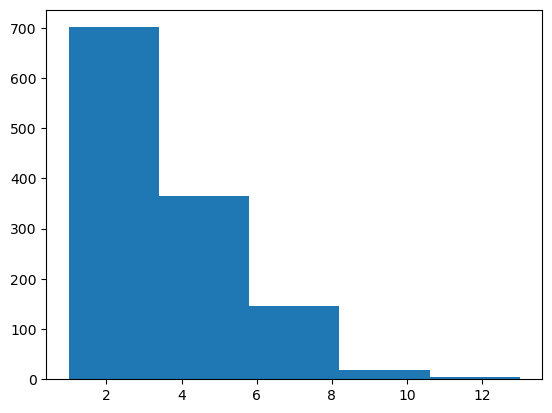

In [76]:
datalen = [len(tokens) for tokens in train_tokens]
plt.hist(datalen, bins=5)
plt.show()

In [87]:
unk_id = token_to_id["<unk>"]
train_ids = [[token_to_id.get(token, unk_id) for token in review] for review in train_tokens]
val_ids = [[token_to_id.get(token, unk_id) for token in review] for review in val_tokens]

max_length = 700
pad_id = token_to_id['<pad>']
train_ids = pad_sequences(train_ids, max_length, pad_id)
val_ids = pad_sequences(val_ids, max_length, pad_id)

print(train_ids[0])

[ 43 110   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

In [88]:
print(val_ids[0])

[  47  323    6 1615    7    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 